In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, classification_report
rcParams['figure.figsize'] = 14,8
sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.5)
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/content/creditcard.csv')

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [11]:
df.shape

(3973, 31)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [13]:
df.isnull().values.any()

True

In [14]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,...,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,...,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,...,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,...,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,...,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,...,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


Text(0, 0.5, 'Frequency')

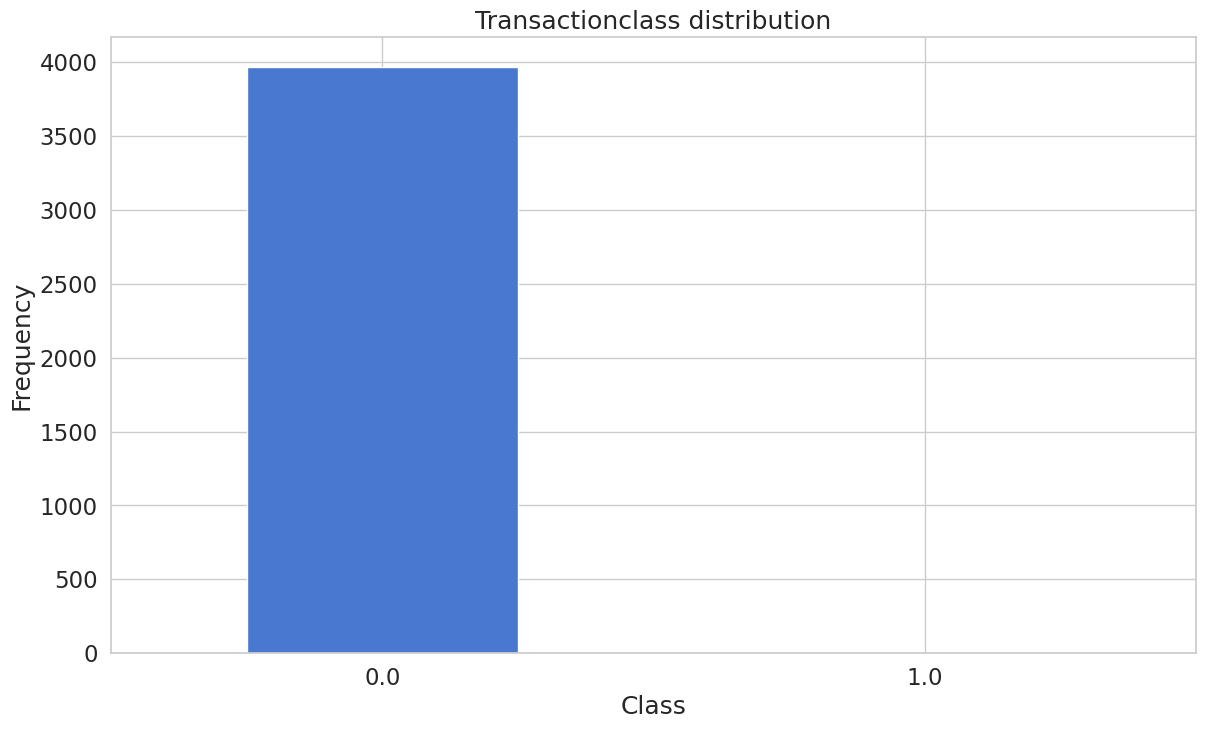

In [15]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transactionclass distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [16]:
fraudulent = df[df.Class == 1]
genuine = df[df.Class == 0]

In [17]:
fraudulent.shape

(2, 31)

In [18]:
genuine.shape

(3970, 31)

In [19]:
fraudulent.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [20]:
genuine.Amount.describe()

count    3970.000000
mean       64.899597
std       213.612570
min         0.000000
25%         2.270000
50%        12.990000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

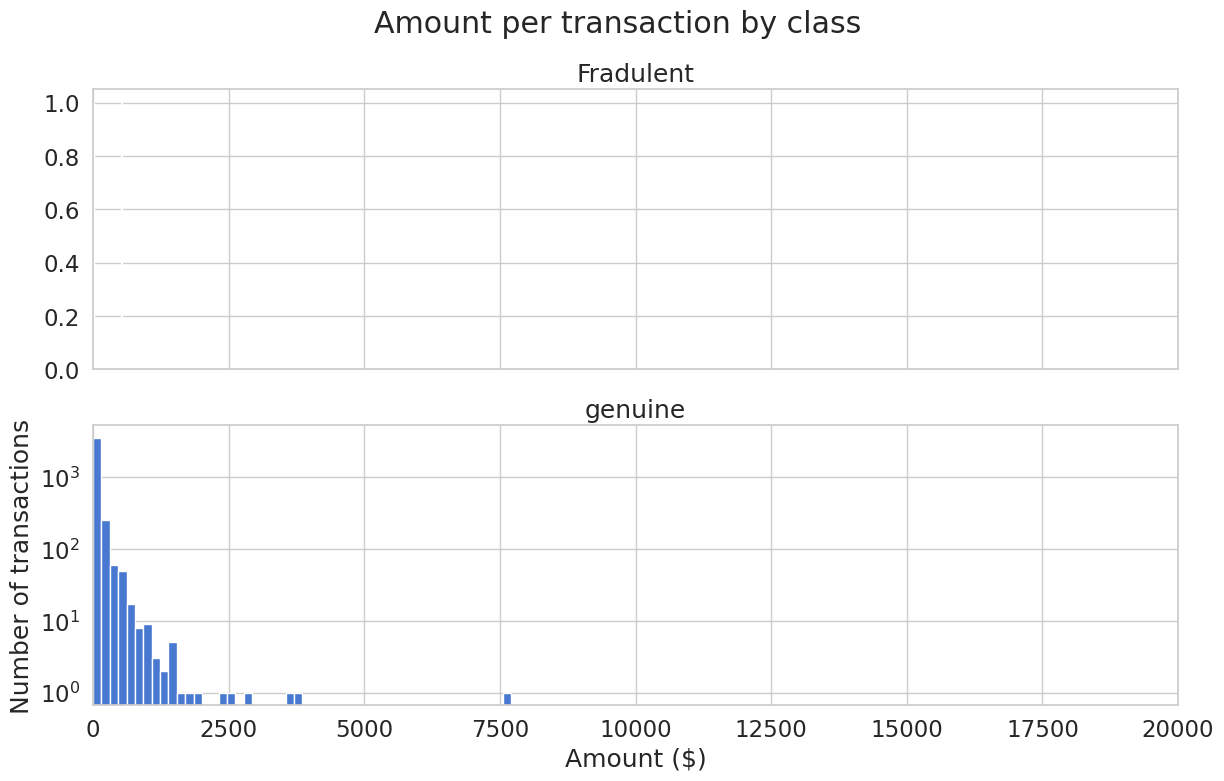

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraudulent.Amount, bins = bins)
ax1.set_title('Fradulent')
ax2.hist(genuine.Amount, bins = bins)
ax2.set_title('genuine')
plt.xlabel('Amount ($)')
plt.ylabel('Number of transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

In [24]:
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
data = df.drop(['Amount'], axis = 1)

In [25]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.396047
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.291630
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.468024
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.273797
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.023354


In [26]:
data = df.drop(['Time'], axis = 1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.396047
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.291630
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.468024
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.273797
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.023354


In [27]:
x = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']

In [28]:
y.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [44]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [47]:
X_train.shape

(2781, 31)

In [48]:
X_test.shape

(1192, 31)